In [1]:
import pandas as pd

heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# create features matrix and target matrix

In [2]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

Choose a model

In [3]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# check default parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# Split the data into tarining and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [7]:
clf.score(X_train, y_train)

1.0

In [9]:
clf.score(X_test, y_test)

0.8524590163934426

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [11]:
confusion_matrix(y_test, y_test)

array([[28,  0],
       [ 0, 33]])

In [12]:
accuracy_score(y_test, y_preds)

0.8524590163934426

# increase accuracy of the models(hyperparametre turning)

In [13]:
import numpy as np
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"trying model with {i} estimators.....")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"model accuracy on test set:{clf.score(X_test, y_test)*100:.2f}")

trying model with 10 estimators.....
model accuracy on test set:81.97
trying model with 20 estimators.....
model accuracy on test set:80.33
trying model with 30 estimators.....
model accuracy on test set:80.33
trying model with 40 estimators.....
model accuracy on test set:80.33
trying model with 50 estimators.....
model accuracy on test set:78.69
trying model with 60 estimators.....
model accuracy on test set:81.97
trying model with 70 estimators.....
model accuracy on test set:85.25
trying model with 80 estimators.....
model accuracy on test set:81.97
trying model with 90 estimators.....
model accuracy on test set:81.97


# save the module

In [14]:
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))
load_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
load_model.score(X_test, y_test)


0.819672131147541

### test with Car data

In [15]:
car_df = pd.read_csv("/home/localdev/ztm-machine-learning/data/car-sales-extended.csv")
car_df

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [16]:
car_df.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [19]:
# split the data 
X = car_df.drop("Price", axis=1)
y = car_df['Price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### convert strings to numbers method 1

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot, categorical_features, )],remainder="passthrough")
transformed_x = transformer.fit_transform(X)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

### Method 2

In [22]:
dummies = pd.get_dummies(car_df[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [23]:
from sklearn.ensemble import RandomForestRegressor
model =RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
model.score(X_test, y_test)

0.2330485230539474

### Working with missing data

In [25]:
# import dataset
car_sales_missing = pd.read_csv("/home/localdev/ztm-machine-learning/data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [26]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

we cannot convert the strings to number if we don't fill the missing data
so first we have to fill the missing data

## pandas method

for the missing values, we fill numerical input with the average of the column and non-numerical
values with something like "missing"....

In [27]:
car_sales_missing["Make"].fillna("missing", inplace=True)
car_sales_missing["Colour"].fillna("missing", inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
car_sales_missing["Doors"].fillna(4, inplace=True)

# we need to drop rows that are not having target varables
car_sales_missing.dropna(inplace=True)
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [28]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

### fill NaN with sklearn method

In [29]:
car_sales_missing = pd.read_csv("/home/localdev/ztm-machine-learning/data/car-sales-extended-missing-data.csv")
car_sales_missing.dropna(subset=["Price"], inplace=True)



In [30]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [32]:
# split the data in features and target varables
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]



from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# we are filling categorical values with "missing" and numerical values with mean of the column
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]


# let's fill the missing rows now using the columntransformer
imputer = ColumnTransformer([("cat_imputer", cat_imputer, cat_features), 
                             ("door_imputer", door_imputer, door_features),
                             ("num_imputer", num_imputer, num_features)])

# transform X
fill_x = imputer.fit_transform(X)
fill_x




array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [34]:
fill_x = pd.DataFrame(fill_x, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
fill_x

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [35]:
# convert strings to numbers
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot, categorical_features, )],remainder="passthrough")
transformed_x = transformer.fit_transform(fill_x)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [37]:
# train model
model = RandomForestRegressor()
# spllit data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22532301070502558

### Picking what estimators to use for specific problems

In [38]:
# import califonia house pricing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [39]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [40]:
# add the target varable to the dataset
housing_df["Price ($100,000)"] = housing["target"]
# housing_df.drop("Price ($100000)", axis=1)

In [41]:
# split the dataset
X = housing_df.drop("Price ($100,000)", axis=1)
y = housing_df["Price ($100,000)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
np.random.seed(42)
# import model...
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6108488126629481

In [36]:
# using randomforest
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8010163964729782

# Classification Problem

In [42]:
# import heart disease dataset
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [43]:
# form the sklearn roadmap, it suggested linearsvc()
from sklearn.svm import LinearSVC
clf = LinearSVC(dual='auto')
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8688524590163934

In [44]:
from sklearn.ensemble import RandomForestClassifier
clf =RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)

RandomForestClassifier()

# make predictions

In [45]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)
y_preds

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

make predictions using predict_proba()

In [46]:
clf.predict_proba(X_test [:5])

array([[0.89, 0.11],
       [0.22, 0.78],
       [0.02, 0.98],
       [0.33, 0.67],
       [0.33, 0.67]])

In [47]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.78      0.86      0.82        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_test, y_test)

array([0.84615385, 0.83333333, 0.75      , 0.83333333, 0.66666667])

# predict with probability (ROC/AOC)

In [49]:
from sklearn.metrics import roc_curve #reciever operating characteristic
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.89, 0.11],
       [0.22, 0.78],
       [0.02, 0.98],
       [0.33, 0.67],
       [0.33, 0.67],
       [0.1 , 0.9 ],
       [0.61, 0.39],
       [0.5 , 0.5 ],
       [0.38, 0.62],
       [0.74, 0.26]])

In [50]:
# so we want probabilities of only positive prediction(when the label predicts one) 
y_probs_positive = y_probs[:, 1]
y_probs_positive[:20]


array([0.11, 0.78, 0.98, 0.67, 0.67, 0.9 , 0.39, 0.5 , 0.62, 0.26, 0.1 ,
       1.  , 0.97, 0.97, 0.83, 0.63, 0.04, 0.4 , 0.7 , 0.38])

In [51]:
# calculate fpr(false positive rate), tpr(True positive rate), and threshold 

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr

array([0.     , 0.     , 0.     , 0.     , 0.03125, 0.03125, 0.03125,
       0.03125, 0.0625 , 0.0625 , 0.09375, 0.09375, 0.125  , 0.125  ,
       0.15625, 0.15625, 0.1875 , 0.1875 , 0.1875 , 0.21875, 0.28125,
       0.3125 , 0.375  , 0.375  , 0.59375, 0.59375, 0.71875, 0.78125,
       0.9375 , 1.     ])

build a simple function to make plots

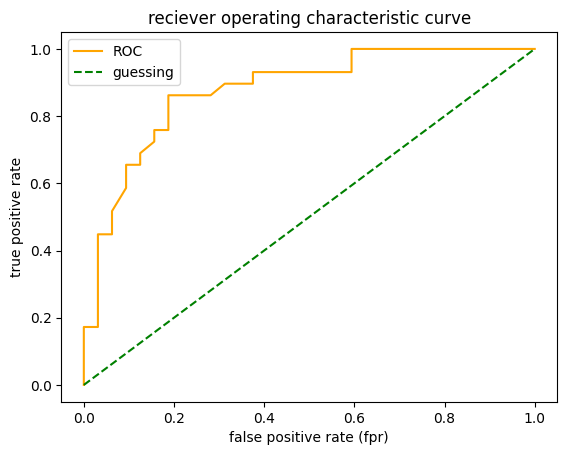

In [52]:
import matplotlib.pyplot as plt

def ploter(fpr, tpr):
    """
    plot a reciever operating characteristic curve given trp and fpr
    """
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # plot a line with no predictive power
    plt.plot([0, 1], [0, 1], color="green", linestyle='--', label="guessing")
    # customize the plot

    plt.xlabel("false positive rate (fpr)")
    plt.ylabel("true positive rate")
    plt.legend()
    # plt.show()

    plt.title("reciever operating characteristic curve")

ploter(fpr, tpr)


## confusion matrix

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds)

array([[25,  7],
       [ 4, 25]])

visualize the above output with pd.crosstabs

In [54]:
pd.crosstab(y_preds, y_test, rownames=["Actual labes"], colnames=["Predicted label"])

Predicted label,0,1
Actual labes,,
0,25,4
1,7,25


Visualize with seaborn


<Axes: >

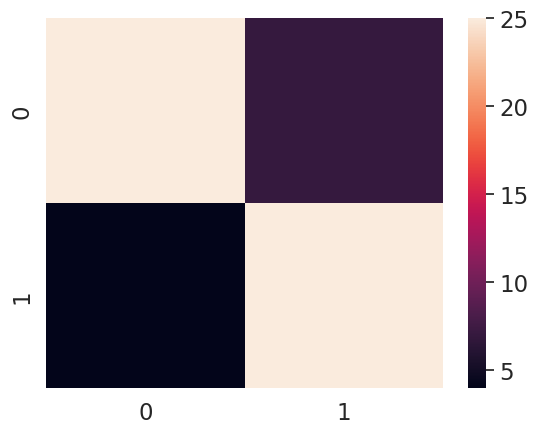

In [55]:
import seaborn as sns
sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat)

### Regerssion  evaluation Metrices

In [57]:
from sklearn.ensemble import RandomForestRegressor
X = housing_df.drop("Price ($100,000)", axis=1)
y = housing_df["Price ($100,000)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8060483211387895

In [58]:
# score the model
from sklearn.metrics import r2_score
y_preds = model.predict(X_test)
r2_score(y_true=y_test, y_pred=y_preds)

0.8060483211387895

In [53]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds )

0.3232769589874033

mae is the absolute difference the ture and predicted label 
* we and to visualize this difference first in a data frame

In [59]:
np.random.seed(42)
df = pd.DataFrame(data={"actual values": y_test, "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
4884,1.264,1.168220,-0.095780
18307,4.178,4.451013,0.273013
4643,3.222,2.328790,-0.893210
18343,4.763,2.904851,-1.858149
19947,0.603,0.584250,-0.018750
16555,1.792,1.747430,-0.044570
17335,1.201,1.525710,0.324710
20386,2.813,2.165760,-0.647240
1377,1.137,1.263610,0.126610
8889,3.833,3.864622,0.031622


In [60]:
np.abs(df["differences"]).mean()

0.3255121375000002

## msr(mean squared error)
* mean of the square of the error between actual label and predicted error

In [61]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_preds)
mse

0.24603497941100366

In [62]:
# add a column to the df 
df["square_differences"] = np.square(df["differences"])
df["square_differences"].mean()

0.24603497941100366

### Evaluate models with scoring

In [63]:

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [64]:
clf = RandomForestClassifier()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# clf.fit(X_train, y_train)
# clf.fit(X_train, y_train)

np.random.seed(42)
heart_disease_shuffled = heart_disease.sample(frac=1)
train = round(0.7 * len(heart_disease_shuffled))
validation = round(train + 0.15*len(heart_disease_shuffled))

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
X_train, y_train = X[:train], y[:train]
X_valid, y_valid = X[train:validation], y[train:validation]
X_test, y_test = X[validation:], y[validation:]

clf.fit(X_train, y_train)
# clf.fit(X_train, y_train)
y_preds = clf.predict(X_valid)

print(cross_val_score(clf, X,  y, scoring="precision"))
print(classification_report(y_valid, y_preds))

[0.82352941 0.87878788 0.84375    0.79411765 0.75675676]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        45
           1       0.00      0.00      0.00         0

    accuracy                           0.71        45
   macro avg       0.50      0.36      0.42        45
weighted avg       1.00      0.71      0.83        45



/home/localdev/.local/share/virtualenvs/machine-learning-ztm-rPYay6DU/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/localdev/.local/share/virtualenvs/machine-learning-ztm-rPYay6DU/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/localdev/.local/share/virtualenvs/machine-learning-ztm-rPYay6DU/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` pa

### HYPERPARAMERET TURNING

In [65]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

# create an evaluation function

def evaluation_metrics(y_true, y_preds):
    """
    preform evaluation comparison on y_true label and y_preds
    """

    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)

    metric_dict = {
        "accuracy":round(accuracy, 2),
        "precision": round(precision, 2),
        "f1": round(f1, 2),
        "recall":round(recall, 2)
    }

    print(f"acc: {accuracy * 100: .2f}%")
    print(f"precision: {precision: .2f}%")
    print(f"f1: {f1: .2f}%")
    print(f"recall: {recall: .2f}%")

    return metric_dict



In [66]:
np.random.seed(42)
heart_disease_shuffled = heart_disease.sample(frac=1)
train = round(0.7 * len(heart_disease_shuffled))
validation = round(train + 0.15*len(heart_disease_shuffled))

In [67]:
X_train.shape, X_test.shape

((212, 13), (46, 13))

In [68]:
from sklearn.metrics import classification_report
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]
X_train, y_train = X[:train], y[:train]
X_valid, y_valid = X[train:validation], y[train:validation]
X_test, y_test = X[validation:], y[validation:]
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)
y_preds

print(classification_report(y_valid, y_preds))

# evaluate the classifier
baseline_metrics = evaluation_metrics(y_valid, y_preds)
evaluation_metrics(y_valid, y_preds)

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.81      0.88      0.85        25

    accuracy                           0.82        45
   macro avg       0.82      0.81      0.82        45
weighted avg       0.82      0.82      0.82        45

acc:  82.22%
precision:  0.81%
f1:  0.85%
recall:  0.88%
acc:  82.22%
precision:  0.81%
f1:  0.85%
recall:  0.88%


{'accuracy': 0.82, 'precision': 0.81, 'f1': 0.85, 'recall': 0.88}

## using "RandomizeCV" for hyperparameter turning

In [69]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
    "n_estimators":[10, 100, 200, 500, 1000, 1200],
    "max_depth":[None, 5, 10, 20, 30],
    "min_samples_split":[2,4,6],
    "min_samples_leaf":[1,2,4]

}

np.random.seed(42)
clf = RandomForestClassifier(n_jobs=1)
rs_clf = RandomizedSearchCV(estimator=clf, param_distributions=grid, n_iter=10, cv=5, verbose=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   2.4s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   2.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   2.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   2.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   2.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, mi

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [70]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 20}